In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
# Load CSV file (update the filename accordingly)
run1 = 'Data/Log104092025184240.csv'
run2 = 'Data/LOG204092025184240.csv'
run3 = 'Data/LOG304092025193841.csv'
df1 = pd.read_csv(run1, skiprows=1)
df2 = pd.read_csv(run2, skiprows=1)
df3 = pd.read_csv(run3, skiprows=1)

In [10]:
def seconds_to_mins(df):
    # Convert times to minutes since first timestamp
    first_time = datetime.combine(datetime.today(), df['Time'].iloc[0])
    time_minutes = df['Time'].apply(lambda t: (datetime.combine(datetime.today(), t) - first_time).total_seconds() / 60)
    return time_minutes

In [11]:
# Convert Time column to datetime.time objects
df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S').dt.time
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M:%S').dt.time
df3['Time'] = pd.to_datetime(df3['Time'], format='%H:%M:%S').dt.time

time_minutes1 = seconds_to_mins(df1)
time_minutes2 = seconds_to_mins(df2)
time_minutes3 = seconds_to_mins(df3)



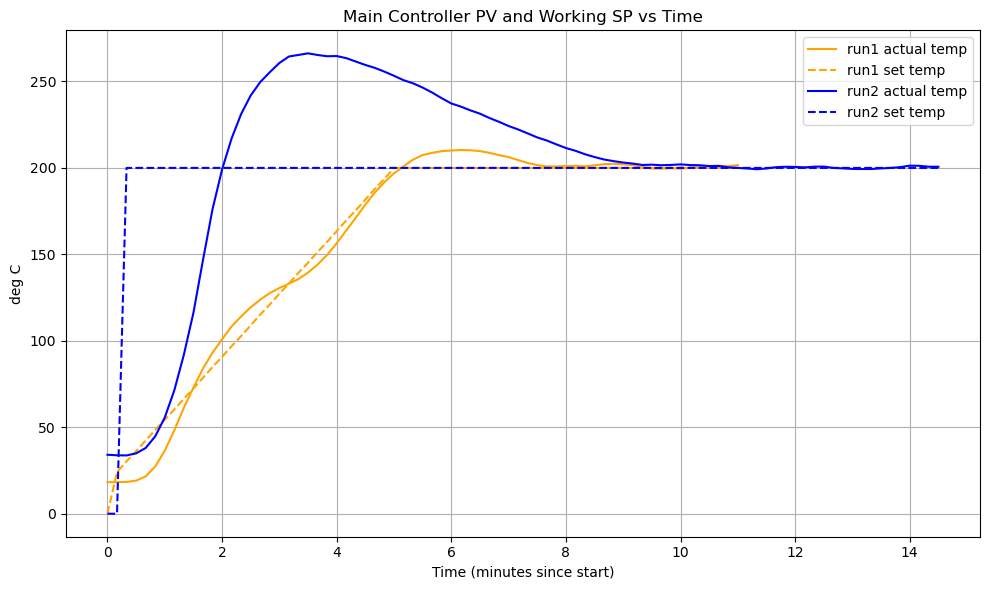

In [18]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_minutes1, df1['Main_Controller_PV'],  color='orange', linestyle='-', label='run1 actual temp')
plt.plot(time_minutes1, df1['Main_Controller_Working_SP'],  color='orange', linestyle='--', label='run1 set temp')

plt.plot(time_minutes2, df2['Main_Controller_PV'], color='blue', linestyle='-', label='run2 actual temp')
plt.plot(time_minutes2, df2['Main_Controller_Working_SP'],  color='blue', linestyle='--', label='run2 set temp')

plt.xlabel('Time (minutes since start)')
plt.ylabel('deg C')
plt.title('Main Controller PV and Working SP vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

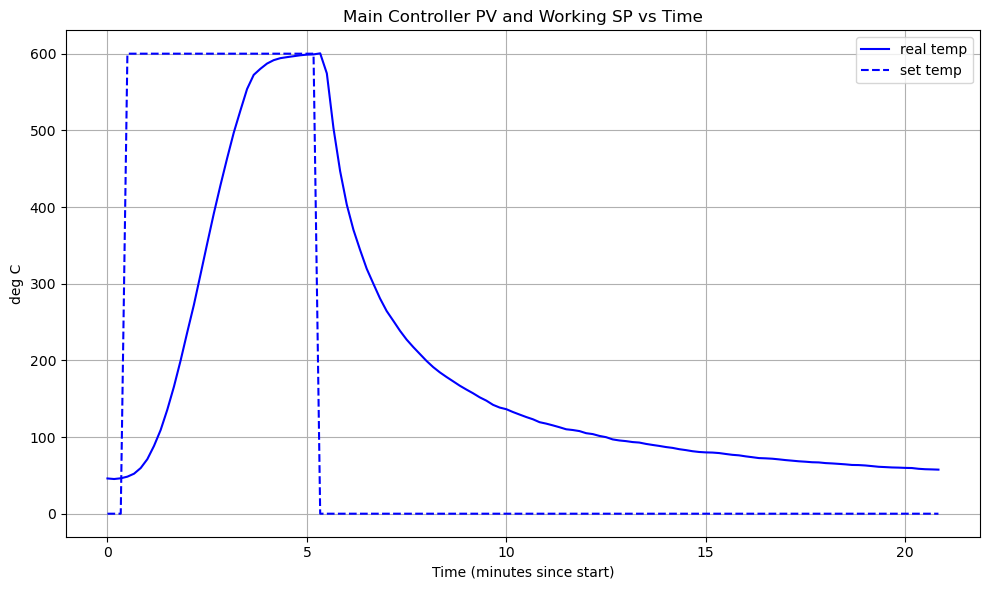

In [21]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_minutes3, df3['Main_Controller_PV'], color='blue', linestyle='-', label='real temp')
plt.plot(time_minutes3, df3['Main_Controller_Working_SP'], color='blue', linestyle='--', label='set temp')

plt.xlabel('Time (minutes since start)')
plt.ylabel('deg C')
plt.title('Main Controller PV and Working SP vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()